(2, 400)


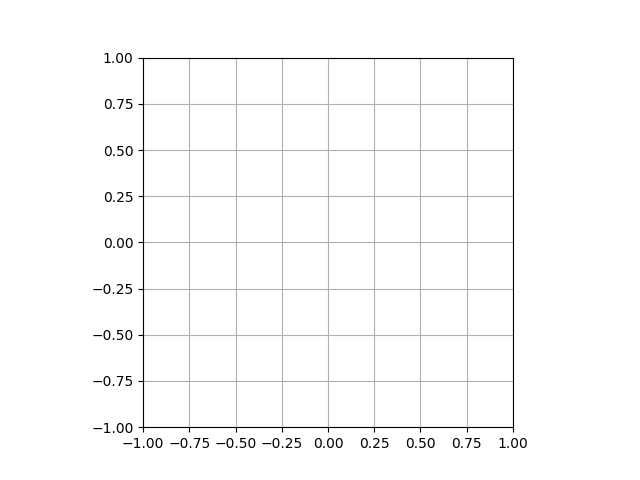

In [1]:
from numpy import sin, cos
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np

#jupyter notebookアニメーション表示用
%matplotlib ipympl

G = 9.8                                 # 重力加速度 [m/s^2]
L = 1.0                                 # 振り子の長さ [m]

# 運動方程式
def derivs(t, state):
    dydt = np.zeros_like(state)
    dydt[0] = state[1]
    dydt[1] = -(G/L)*sin(state[0])
    return dydt

t_span = [0,20]                         # 観測時間 [s]
dt = 0.05                               # 間隔 [s]
t = np.arange(t_span[0], t_span[1], dt)           
th1 = 30.0                              # 初期角度 [deg]
w1 = 0.0                                # 初期角速度 [deg/s]
state = np.radians([th1, w1])           # 初期状態

sol = solve_ivp(derivs, t_span, state, t_eval=t)
theta = sol.y[0,:]
print(np.shape(sol.y))

x = L * sin(theta)       # x = Lsin(theta)
y = -L * cos(theta)      # y = -Lcos(theta)

fig, ax = plt.subplots()

line, = ax.plot([], [], 'o-', linewidth=2) # このlineに次々と座標を代入して描画

def animate(i):
    thisx = [0, x[i]]
    thisy = [0, y[i]]

    line.set_data(thisx, thisy)
    return line,

ani = FuncAnimation(fig, animate, frames=np.arange(0, len(t)), interval=25, blit=True)

ax.set_xlim(-L,L)
ax.set_ylim(-L,L)
ax.set_aspect('equal')
ax.grid()
plt.show()

# ani.save('pendulum.gif', writer='pillow', fps=15)
